
# Linear Classifier Lab

This lab explores a simple **random-search linear classifier** in 2D.
You'll modify the data, track the classifier's performance, constrain the model, and
test it on nonlinear data.

**Getting started**
- Run the setup cell(s) below to import libraries and define helper functions.


Best Weights: [0.09643182 0.07900718]
Best Bias: -0.8235313494287311
Best Accuracy: 0.9600


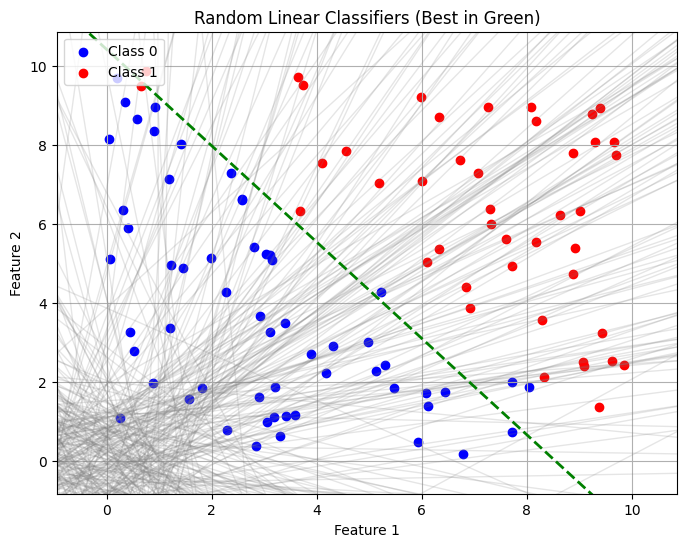

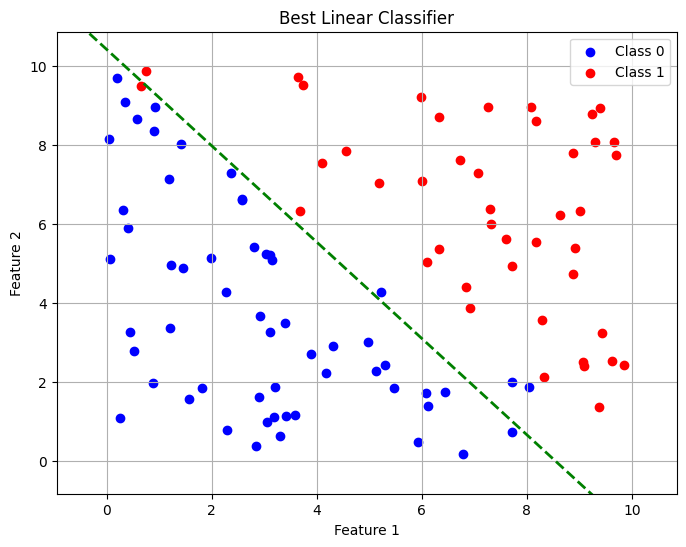

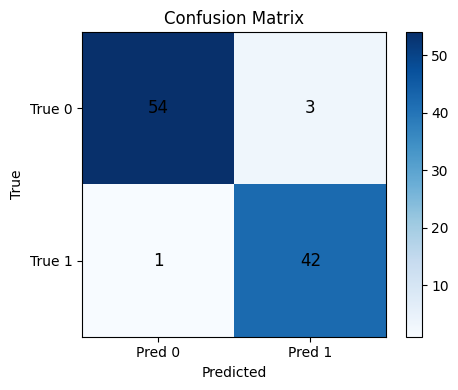

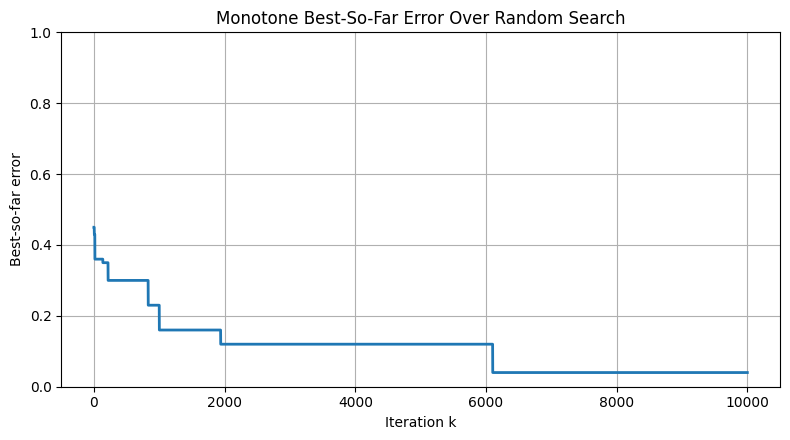

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ---------------------------
# Plotting helpers
# ---------------------------
def _plot_points(ax, X, y):
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='red',  label='Class 1')

def _data_limits(X, pad=1.0):
    xlim = (X[:, 0].min() - pad, X[:, 0].max() + pad)
    ylim = (X[:, 1].min() - pad, X[:, 1].max() + pad)
    return xlim, ylim

def _plot_line_from_wb(ax, w, b, xlim, *, color='gray', alpha=0.2, lw=1.0, ls='-'):
    w0, w1 = float(w[0]), float(w[1])
    b = float(b)
    if abs(w1) > 1e-12:
        xx1 = np.linspace(xlim[0], xlim[1], 100)
        xx2 = (-w0 * xx1 - b) / w1
        ax.plot(xx1, xx2, color=color, alpha=alpha, linewidth=lw, linestyle=ls)
    elif abs(w0) > 1e-12:
        x = -b / w0
        ax.axvline(x=x, color=color, alpha=alpha, linewidth=lw, linestyle=ls)

def plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300):
    """Plots up to max_lines random decision boundaries (gray) and highlights the best (green).
       Figure is zoomed to the training data extent."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Random Linear Classifiers (Best in Green)')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    n = len(all_biases)
    if n > max_lines:
        idx = np.random.choice(n, size=max_lines, replace=False)
    else:
        idx = np.arange(n)

    for i in idx:
        _plot_line_from_wb(ax, all_weights[i], all_biases[i], xlim,
                           color='gray', alpha=0.2, lw=1.0, ls='-')

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_best_only(X, y, best_weights, best_bias):
    """Plots only the best decision boundary with the data, zoomed to training data."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Best Linear Classifier')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Plots confusion matrix as a heatmap."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.xticks([0, 1], ["Pred 0", "Pred 1"])
    plt.yticks([0, 1], ["True 0", "True 1"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    for i in range(2):
        for j in range(2):
            plt.text(j, i, int(cm[i, j]), ha="center", va="center", color="black", fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_best_so_far_error(cum_best_error):
    """Plots the monotone best-so-far error vs iteration k."""
    plt.figure(figsize=(8, 4.5))
    plt.plot(cum_best_error, linewidth=2)
    plt.xlabel("Iteration k")
    plt.ylabel("Best-so-far error")
    plt.title("Monotone Best-So-Far Error Over Random Search")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def compute_accuracy(X, y, weights, bias):
    scores = weights[0] * X[:, 0] + weights[1] * X[:, 1] + bias
    preds = (scores > 0).astype(int)
    acc = (preds == y).mean()
    return acc, preds

#Data + Random Search (loop)
np.random.seed(42)
num_samples = 100
X = np.random.rand(num_samples, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)


k = 10000
all_weights, all_biases = [], []
acc_history, best_acc_history = [], []
best_weights, best_bias = None, None
best_error = np.inf
best_preds = None
cum_best_error = []
tol = 0.0

for _ in range(k):
    weights = np.random.rand(2) * 2 - 1
    bias = np.random.rand() * 2 - 1

    acc, preds = compute_accuracy(X, y, weights, bias)
    err = 1.0 - acc

    all_weights.append(weights)
    all_biases.append(bias)

    if err < best_error - tol:
        best_error = err
        best_weights = weights
        best_bias = bias
        best_preds = preds

    cum_best_error.append(best_error)

    acc_history.append(acc)
    best_acc_history.append(1.0-best_error)

cum_best_error = np.array(cum_best_error)

print(f"Best Weights: {best_weights}")
print(f"Best Bias: {best_bias}")
print(f"Best Accuracy: {1.0 - best_error:.4f}")

plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300)
plot_best_only(X, y, best_weights, best_bias)
plot_confusion_matrix(y, best_preds)
plot_best_so_far_error(cum_best_error)


## Problem 1: Data Distribution Change

**bold text**
- **Two distinct distributions implemented :** Clear changes (e.g., threshold, imbalance, Gaussians, rotation).
- **Re-run & visualize :** Classifier retrained and plots updated (boundaries + confusion matrix).  
- **Analysis :** 2–4 sentences explaining effects on error/accuracy and decision boundary.


Best Weights: [0.08622752 0.01085265]
Best Bias: -0.9135758987036726
Best Accuracy: 0.9300


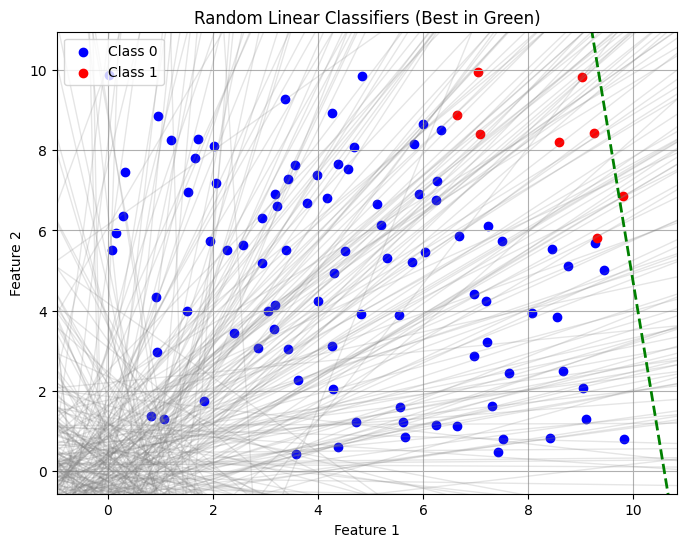

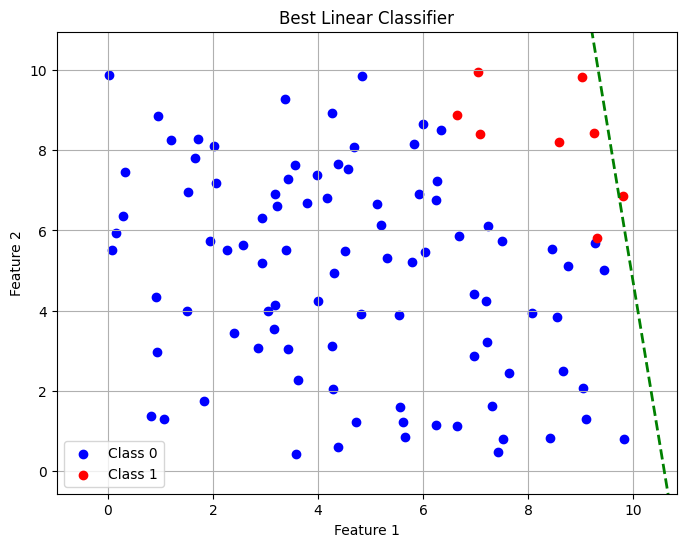

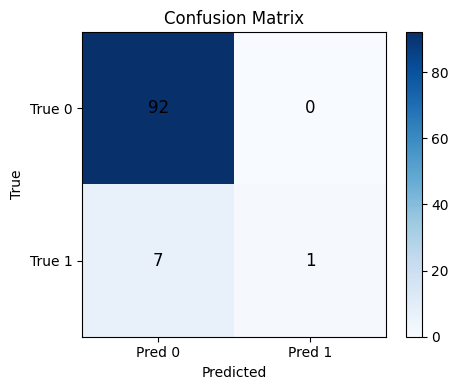

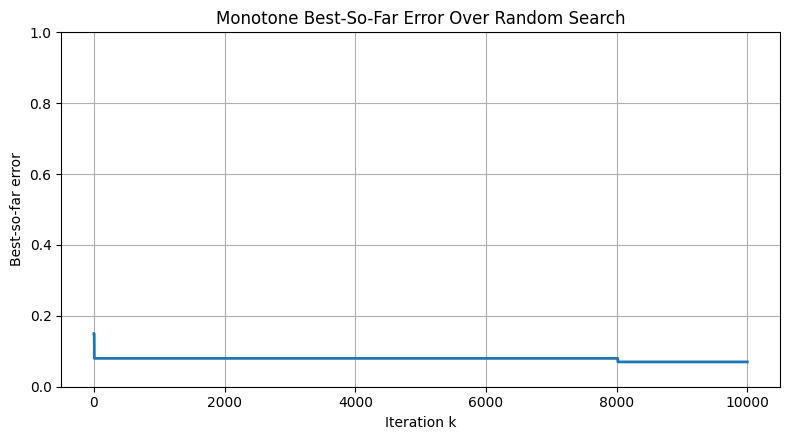

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ---------------------------
# Plotting helpers
# ---------------------------
def _plot_points(ax, X, y):
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='red',  label='Class 1')

def _data_limits(X, pad=1.0):
    xlim = (X[:, 0].min() - pad, X[:, 0].max() + pad)
    ylim = (X[:, 1].min() - pad, X[:, 1].max() + pad)
    return xlim, ylim

def _plot_line_from_wb(ax, w, b, xlim, *, color='gray', alpha=0.2, lw=1.0, ls='-'):
    w0, w1 = float(w[0]), float(w[1])
    b = float(b)
    if abs(w1) > 1e-12:
        xx1 = np.linspace(xlim[0], xlim[1], 100)
        xx2 = (-w0 * xx1 - b) / w1
        ax.plot(xx1, xx2, color=color, alpha=alpha, linewidth=lw, linestyle=ls)
    elif abs(w0) > 1e-12:
        x = -b / w0
        ax.axvline(x=x, color=color, alpha=alpha, linewidth=lw, linestyle=ls)

def plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300):
    """Plots up to max_lines random decision boundaries (gray) and highlights the best (green).
       Figure is zoomed to the training data extent."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Random Linear Classifiers (Best in Green)')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    n = len(all_biases)
    if n > max_lines:
        idx = np.random.choice(n, size=max_lines, replace=False)
    else:
        idx = np.arange(n)

    for i in idx:
        _plot_line_from_wb(ax, all_weights[i], all_biases[i], xlim,
                           color='gray', alpha=0.2, lw=1.0, ls='-')

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_best_only(X, y, best_weights, best_bias):
    """Plots only the best decision boundary with the data, zoomed to training data."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Best Linear Classifier')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Plots confusion matrix as a heatmap."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.xticks([0, 1], ["Pred 0", "Pred 1"])
    plt.yticks([0, 1], ["True 0", "True 1"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    for i in range(2):
        for j in range(2):
            plt.text(j, i, int(cm[i, j]), ha="center", va="center", color="black", fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_best_so_far_error(cum_best_error):
    """Plots the monotone best-so-far error vs iteration k."""
    plt.figure(figsize=(8, 4.5))
    plt.plot(cum_best_error, linewidth=2)
    plt.xlabel("Iteration k")
    plt.ylabel("Best-so-far error")
    plt.title("Monotone Best-So-Far Error Over Random Search")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def compute_accuracy(X, y, weights, bias):
    scores = weights[0] * X[:, 0] + weights[1] * X[:, 1] + bias
    preds = (scores > 0).astype(int)
    acc = (preds == y).mean()
    return acc, preds

#Data + Random Search (loop)
# First distribution implemented, higher threshold and fewer points labeled 1, therefore imbalance

np.random.seed(123)
num_samples = 100
X = np.random.rand(num_samples, 2) * 10
y = (X[:, 0] + X[:, 1] > 15.0).astype(int)


k = 10000
all_weights, all_biases = [], []
acc_history, best_acc_history = [], []
best_weights, best_bias = None, None
best_error = np.inf
best_preds = None
cum_best_error = []
tol = 0.0

for _ in range(k):
    weights = np.random.rand(2) * 2 - 1
    bias = np.random.rand() * 2 - 1

    acc, preds = compute_accuracy(X, y, weights, bias)
    err = 1.0 - acc

    all_weights.append(weights)
    all_biases.append(bias)

    if err < best_error - tol:
        best_error = err
        best_weights = weights
        best_bias = bias
        best_preds = preds

    cum_best_error.append(best_error)

    acc_history.append(acc)
    best_acc_history.append(1.0-best_error)

cum_best_error = np.array(cum_best_error)

print(f"Best Weights: {best_weights}")
print(f"Best Bias: {best_bias}")
print(f"Best Accuracy: {1.0 - best_error:.4f}")

plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300)
plot_best_only(X, y, best_weights, best_bias)
plot_confusion_matrix(y, best_preds)
plot_best_so_far_error(cum_best_error)


Best Weights: [0.16369261 0.12458193]
Best Bias: -0.6360950395305061
Best Accuracy: 1.0000


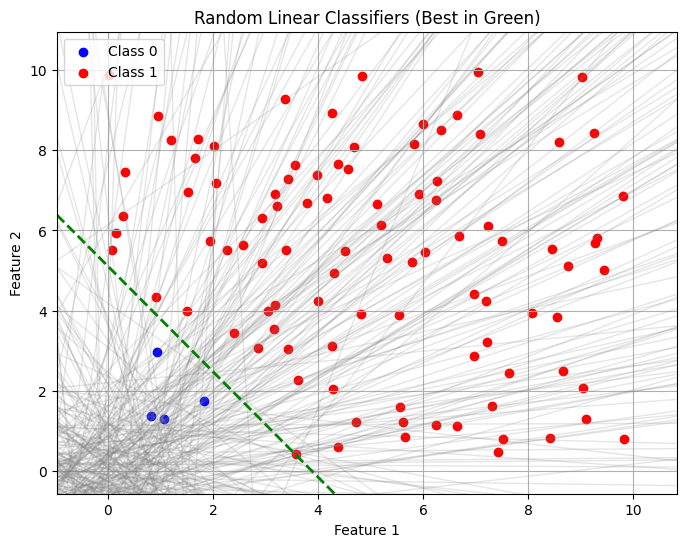

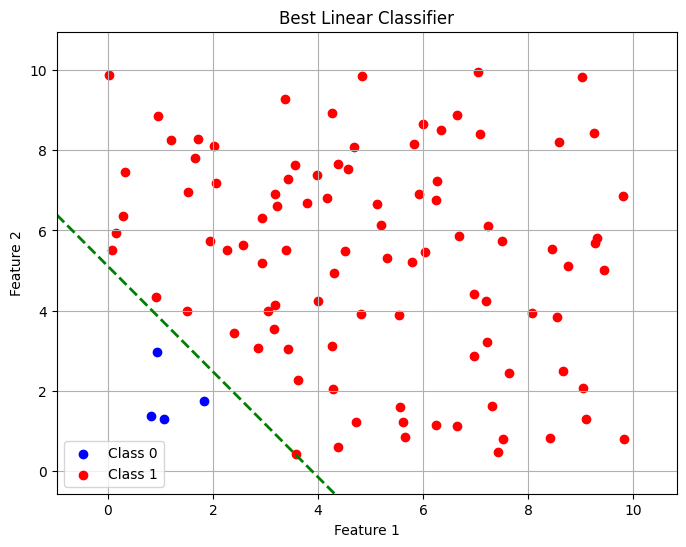

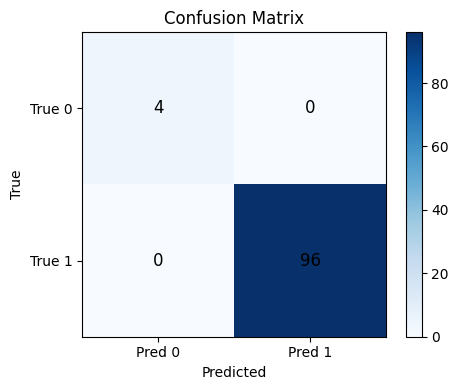

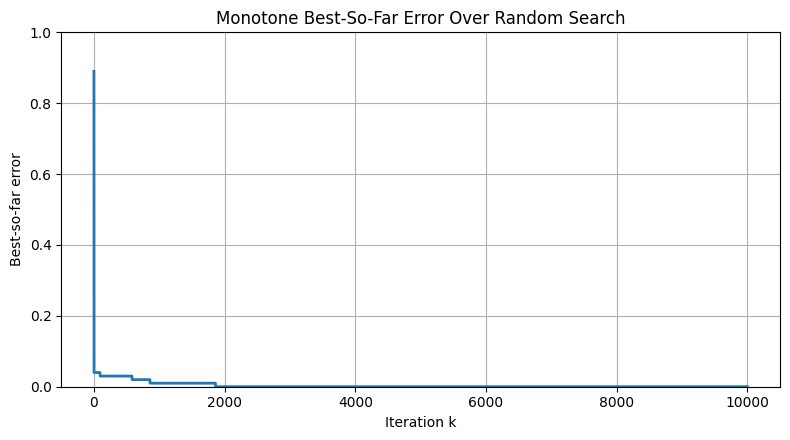

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ---------------------------
# Plotting helpers
# ---------------------------
def _plot_points(ax, X, y):
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='red',  label='Class 1')

def _data_limits(X, pad=1.0):
    xlim = (X[:, 0].min() - pad, X[:, 0].max() + pad)
    ylim = (X[:, 1].min() - pad, X[:, 1].max() + pad)
    return xlim, ylim

def _plot_line_from_wb(ax, w, b, xlim, *, color='gray', alpha=0.2, lw=1.0, ls='-'):
    w0, w1 = float(w[0]), float(w[1])
    b = float(b)
    if abs(w1) > 1e-12:
        xx1 = np.linspace(xlim[0], xlim[1], 100)
        xx2 = (-w0 * xx1 - b) / w1
        ax.plot(xx1, xx2, color=color, alpha=alpha, linewidth=lw, linestyle=ls)
    elif abs(w0) > 1e-12:
        x = -b / w0
        ax.axvline(x=x, color=color, alpha=alpha, linewidth=lw, linestyle=ls)

def plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300):
    """Plots up to max_lines random decision boundaries (gray) and highlights the best (green).
       Figure is zoomed to the training data extent."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Random Linear Classifiers (Best in Green)')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    n = len(all_biases)
    if n > max_lines:
        idx = np.random.choice(n, size=max_lines, replace=False)
    else:
        idx = np.arange(n)

    for i in idx:
        _plot_line_from_wb(ax, all_weights[i], all_biases[i], xlim,
                           color='gray', alpha=0.2, lw=1.0, ls='-')

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_best_only(X, y, best_weights, best_bias):
    """Plots only the best decision boundary with the data, zoomed to training data."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Best Linear Classifier')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Plots confusion matrix as a heatmap."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.xticks([0, 1], ["Pred 0", "Pred 1"])
    plt.yticks([0, 1], ["True 0", "True 1"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    for i in range(2):
        for j in range(2):
            plt.text(j, i, int(cm[i, j]), ha="center", va="center", color="black", fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_best_so_far_error(cum_best_error):
    """Plots the monotone best-so-far error vs iteration k."""
    plt.figure(figsize=(8, 4.5))
    plt.plot(cum_best_error, linewidth=2)
    plt.xlabel("Iteration k")
    plt.ylabel("Best-so-far error")
    plt.title("Monotone Best-So-Far Error Over Random Search")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def compute_accuracy(X, y, weights, bias):
    scores = weights[0] * X[:, 0] + weights[1] * X[:, 1] + bias
    preds = (scores > 0).astype(int)
    acc = (preds == y).mean()
    return acc, preds

#Data + Random Search (loop)
# Second distribution implemented, lower threshold and more points labeled 1
np.random.seed(123)
num_samples = 100
X = np.random.rand(num_samples, 2) * 10
y = (X[:, 0] + X[:, 1] > 4.0).astype(int)

k = 10000
all_weights, all_biases = [], []
acc_history, best_acc_history = [], []
best_weights, best_bias = None, None
best_error = np.inf
best_preds = None
cum_best_error = []
tol = 0.0

for _ in range(k):
    weights = np.random.rand(2) * 2 - 1
    bias = np.random.rand() * 2 - 1

    acc, preds = compute_accuracy(X, y, weights, bias)
    err = 1.0 - acc

    all_weights.append(weights)
    all_biases.append(bias)

    if err < best_error - tol:
        best_error = err
        best_weights = weights
        best_bias = bias
        best_preds = preds

    cum_best_error.append(best_error)

    acc_history.append(acc)
    best_acc_history.append(1.0-best_error)

cum_best_error = np.array(cum_best_error)

print(f"Best Weights: {best_weights}")
print(f"Best Bias: {best_bias}")
print(f"Best Accuracy: {1.0 - best_error:.4f}")

plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300)
plot_best_only(X, y, best_weights, best_bias)
plot_confusion_matrix(y, best_preds)
plot_best_so_far_error(cum_best_error)



Analysis:
Original values:
Best Weights: [0.10349793 0.10367961]
Best Bias: -0.9841478942529731
Best Accuracy: 0.9300

First distribution implemented, higher threshold and fewer points labeled 1, therefore imbalance
 :

Best Weights: [0.08622752 0.01085265]
Best Bias: -0.9135758987036726
Best Accuracy: 0.9300

Second distribution implemented, lower threshold and more points labeled 1:

Best Weights: [0.16369261 0.12458193]
Best Bias: -0.6360950395305061
Best Accuracy: 1.0000

For the first distribution, increasing threashold created imbalance and fewer points were labeled as class 1. Classifier weights and bias adjusted but accuracy stayed the same, suggesting that the boundary still roughly separates the classes iven with imbalance.

For the second distribution, lowering the threshold labeled more points as class 1 which maked the classes more balanced and separable. Classifier adapted with bigger weights and bias decreased. It got to 100% accuracy and the decision boundary moved to better divide the expanded class 1 region.

## Problem 2: Tune the Random Search & Tolerance (TODO)


### 🧭 Rubric (Problem 2) — 15 pts
- **Experiments run (6 pts):** At least two `k` values and two `tol` values tried; curves shown.  
- **Best-so-far error plots (5 pts):** Axes labeled, y in [0,1], curves readable.  
- **Summary (4 pts):** Note trends (e.g., larger `k` → lower best error; nonzero `tol` smooths updates).


In [5]:

# TODO: experiment with k and tol here; re-run the random search loop each time and plot.
k = 1000
tol = 1e-12


In [3]:
k = 20000
tol = 1e-11

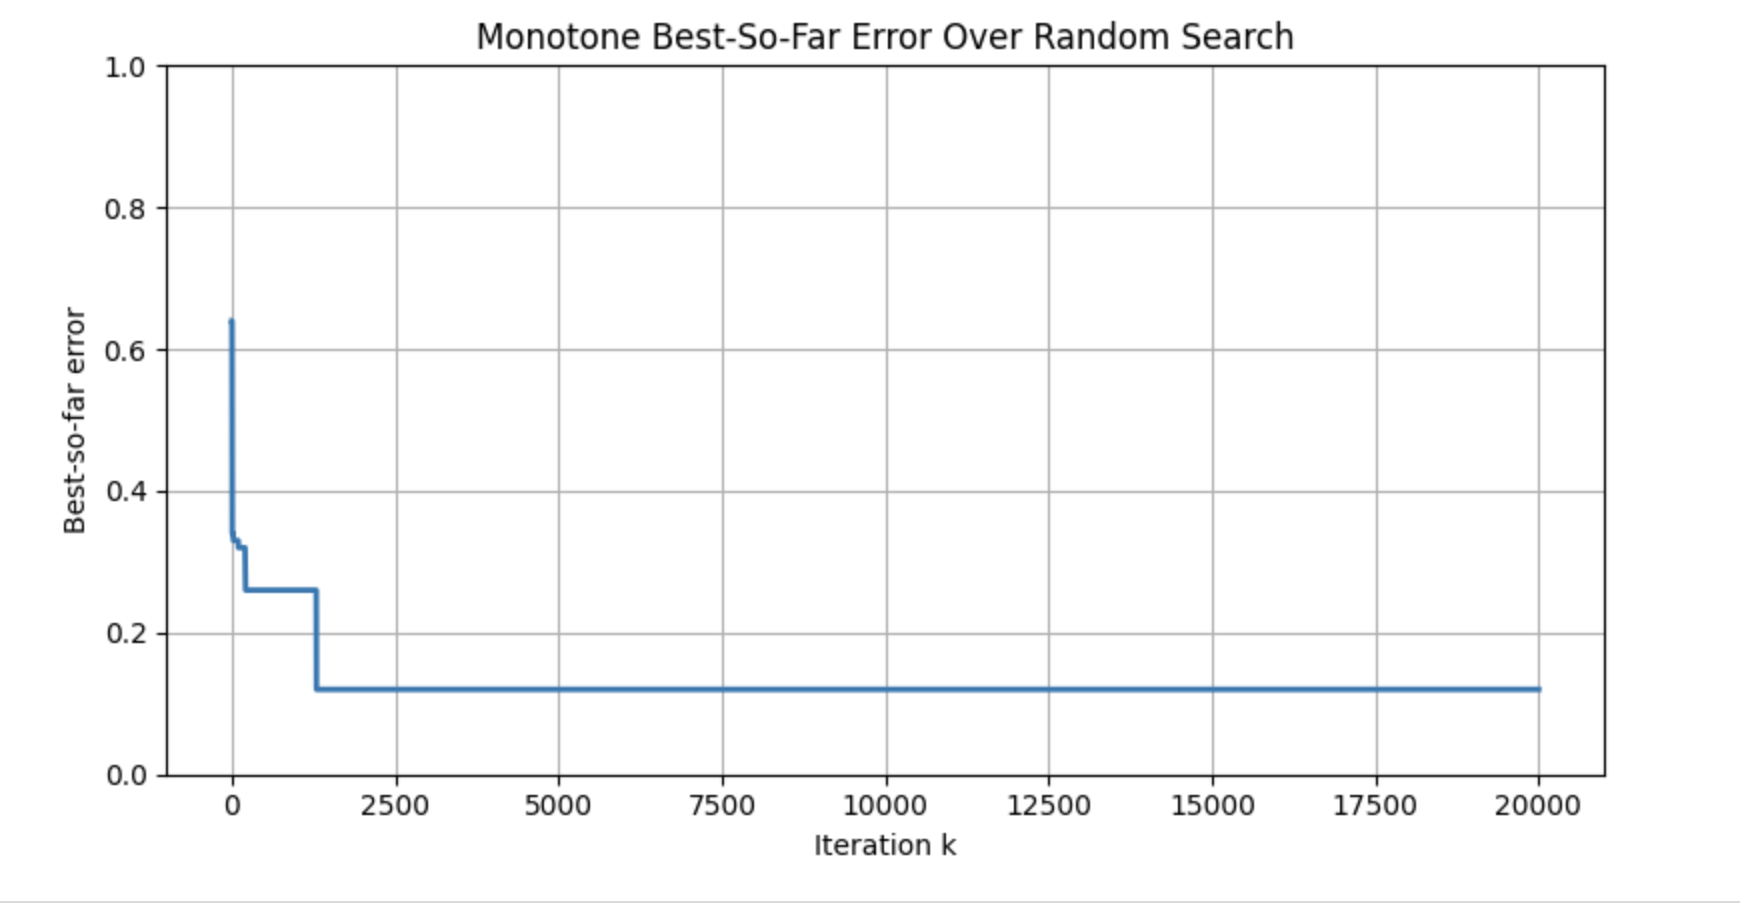

In [4]:
k = 100
tol = 1e-3

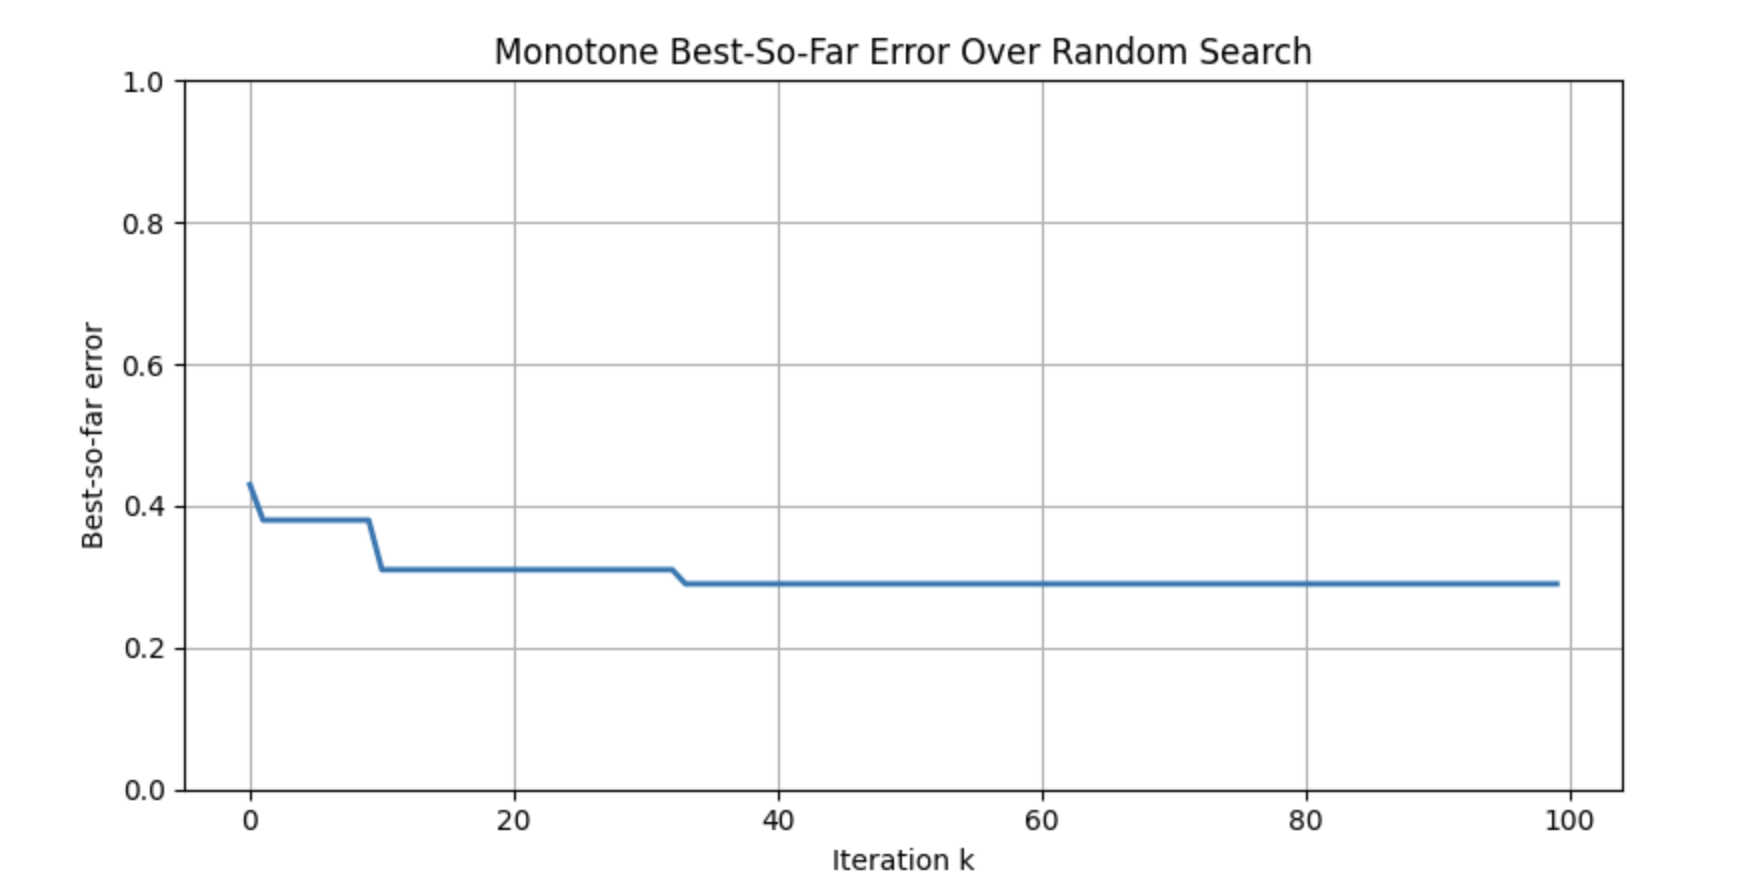

Here we see that increasing k allow the random search consider more possible classifiers that results in a lower bes-so-far error curve while ignoring improvements that are smaller than 1e-11 that makes the plot less abrupt and smother. Meanwhile in comparison to the k=100 we see that the best-so-far error is bigger

## Problem 3: Plot Accuracy History (TODO)


### 🧭 Rubric (Problem 3) — 20 pts
- **Tracking implemented (8 pts):** `acc_history` and `best_acc_history` correctly recorded per iteration.  
- **Plot quality (6 pts):** Both curves plotted with legend, y in [0,1], labels, grid.  
- **Interpretation (6 pts):** 2–4 sentences comparing noisy per-iteration vs monotone best-so-far.


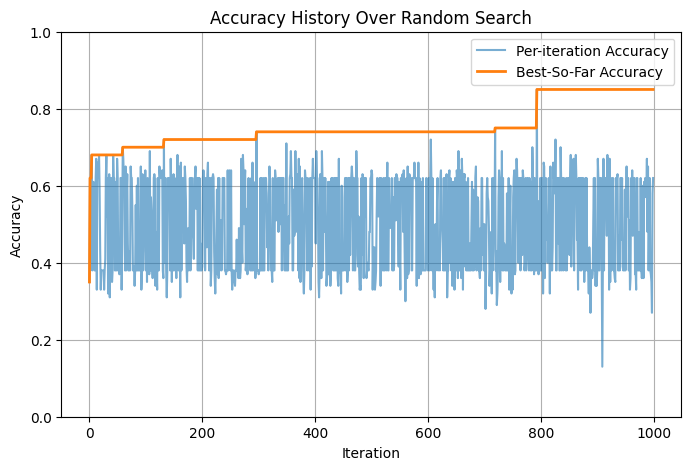

In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(acc_history, label='Per-iteration Accuracy', alpha=0.6)
plt.plot(best_acc_history, label='Best-So-Far Accuracy', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy History Over Random Search")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

Per-iteration accuracy is noisy because each set of weights and bias can perform either better or worth than previous, while best-so-far curve is updated if we find better classifier, it also doesn't decrease, showing the general improvement of the algorithm

## Problem 4: Restrict the Classifier (TODO)


### 🧭 Rubric (Problem 4) — 20 pts
- **Constraint implemented (8 pts):** One or more restrictions applied (axis-aligned / slope bound / zero-bias).  
- **Results shown (6 pts):** Plots + confusion matrix after restriction; code runs.  
- **Discussion (6 pts):** Trade-offs explained (e.g., bias-variance, capacity limits, geometry).


Best Weights: [ 0.28799909 -0.18253166]
Best Bias: 0
Best Accuracy: 0.6300


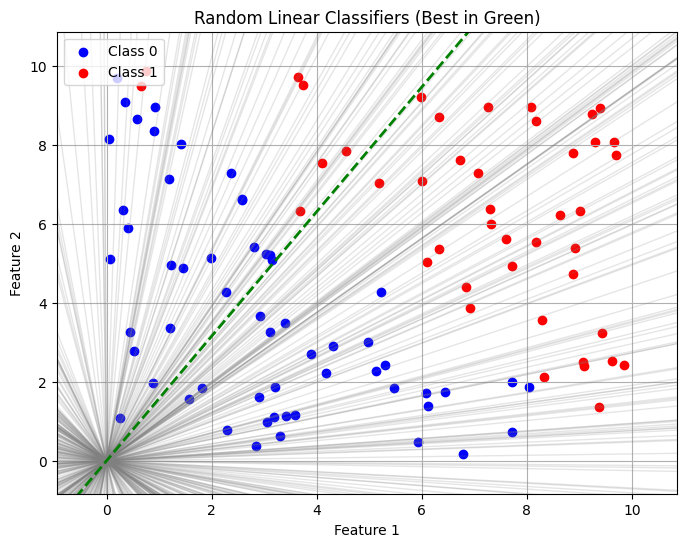

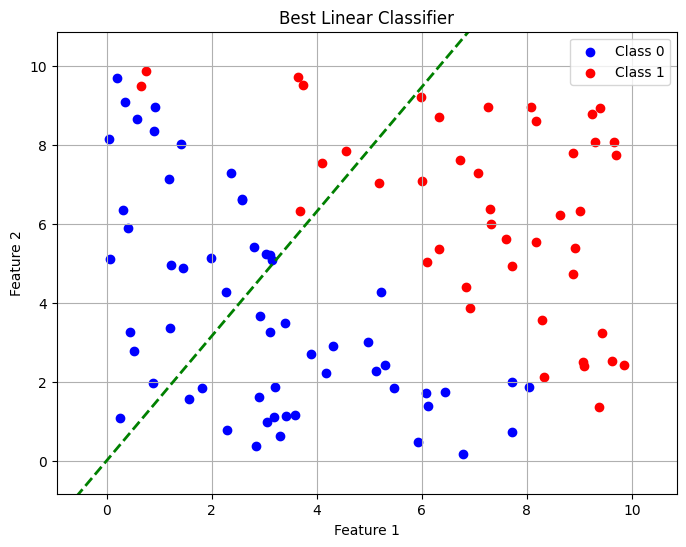

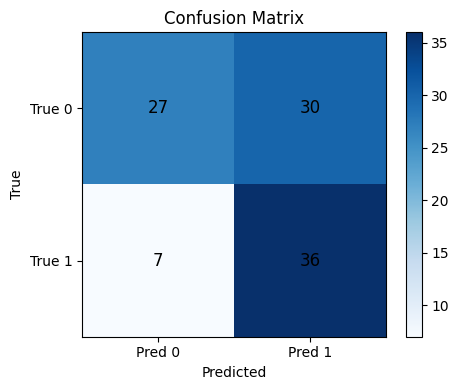

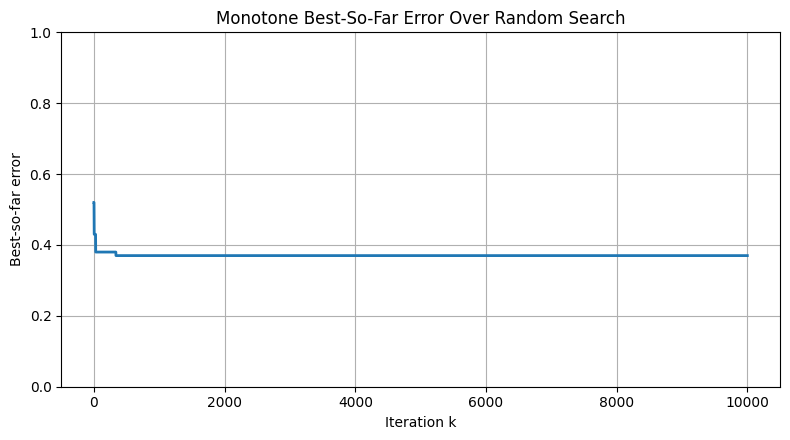

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ---------------------------
# Plotting helpers
# ---------------------------
def _plot_points(ax, X, y):
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='red',  label='Class 1')

def _data_limits(X, pad=1.0):
    xlim = (X[:, 0].min() - pad, X[:, 0].max() + pad)
    ylim = (X[:, 1].min() - pad, X[:, 1].max() + pad)
    return xlim, ylim

def _plot_line_from_wb(ax, w, b, xlim, *, color='gray', alpha=0.2, lw=1.0, ls='-'):
    w0, w1 = float(w[0]), float(w[1])
    b = float(b)
    if abs(w1) > 1e-12:
        xx1 = np.linspace(xlim[0], xlim[1], 100)
        xx2 = (-w0 * xx1 - b) / w1
        ax.plot(xx1, xx2, color=color, alpha=alpha, linewidth=lw, linestyle=ls)
    elif abs(w0) > 1e-12:
        x = -b / w0
        ax.axvline(x=x, color=color, alpha=alpha, linewidth=lw, linestyle=ls)

def plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300):
    """Plots up to max_lines random decision boundaries (gray) and highlights the best (green).
       Figure is zoomed to the training data extent."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Random Linear Classifiers (Best in Green)')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    n = len(all_biases)
    if n > max_lines:
        idx = np.random.choice(n, size=max_lines, replace=False)
    else:
        idx = np.arange(n)

    for i in idx:
        _plot_line_from_wb(ax, all_weights[i], all_biases[i], xlim,
                           color='gray', alpha=0.2, lw=1.0, ls='-')

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_best_only(X, y, best_weights, best_bias):
    """Plots only the best decision boundary with the data, zoomed to training data."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Best Linear Classifier')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Plots confusion matrix as a heatmap."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.xticks([0, 1], ["Pred 0", "Pred 1"])
    plt.yticks([0, 1], ["True 0", "True 1"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    for i in range(2):
        for j in range(2):
            plt.text(j, i, int(cm[i, j]), ha="center", va="center", color="black", fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_best_so_far_error(cum_best_error):
    """Plots the monotone best-so-far error vs iteration k."""
    plt.figure(figsize=(8, 4.5))
    plt.plot(cum_best_error, linewidth=2)
    plt.xlabel("Iteration k")
    plt.ylabel("Best-so-far error")
    plt.title("Monotone Best-So-Far Error Over Random Search")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def compute_accuracy(X, y, weights, bias):
    scores = weights[0] * X[:, 0] + weights[1] * X[:, 1] + bias
    preds = (scores > 0).astype(int)
    acc = (preds == y).mean()
    return acc, preds

# Data + Random Search (loop)
np.random.seed(42)
num_samples = 100
X = np.random.rand(num_samples, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)


k = 10000
all_weights, all_biases = [], []
acc_history, best_acc_history = [], []
best_weights, best_bias = None, None
best_error = np.inf
best_preds = None
cum_best_error = []
tol = 0.0

for _ in range(k):
    weights = np.random.rand(2) * 2 - 1
    bias = 0

    acc, preds = compute_accuracy(X, y, weights, bias)
    err = 1.0 - acc

    all_weights.append(weights)
    all_biases.append(bias)

    if err < best_error - tol:
        best_error = err
        best_weights = weights
        best_bias = bias
        best_preds = preds

    cum_best_error.append(best_error)

    acc_history.append(acc)
    best_acc_history.append(1.0-best_error)

cum_best_error = np.array(cum_best_error)

print(f"Best Weights: {best_weights}")
print(f"Best Bias: {best_bias}")
print(f"Best Accuracy: {1.0 - best_error:.4f}")

plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300)
plot_best_only(X, y, best_weights, best_bias)
plot_confusion_matrix(y, best_preds)
plot_best_so_far_error(cum_best_error)


By setting bias to 0 we foce classifier to chose the decision boundary that always passes through the origin. If the data is not symetric around the origin it will make the model less flexible and can increase errors. However it can be usufel when we want to make the model more simple and less influenced by random changes in data

## Problem 5: Nonlinear Data (TODO)


### 🧭 Rubric (Problem 5) — 25 pts
- **Nonlinear dataset (8 pts):** Circles/moons or equivalent generated (document parameters).  
- **Evaluation (8 pts):** Linear classifier trained, plots + confusion matrix included.  
- **Reasoning (6 pts):** Why linear fails here; geometry of boundary vs. data.  
- **(Optional +3 pts):** Simple feature mapping (e.g., quadratic terms) with brief comparison.


Best Weights: [0.92474241 0.96957671]
Best Bias: 0.6868329031210165
Best Accuracy: 0.6700


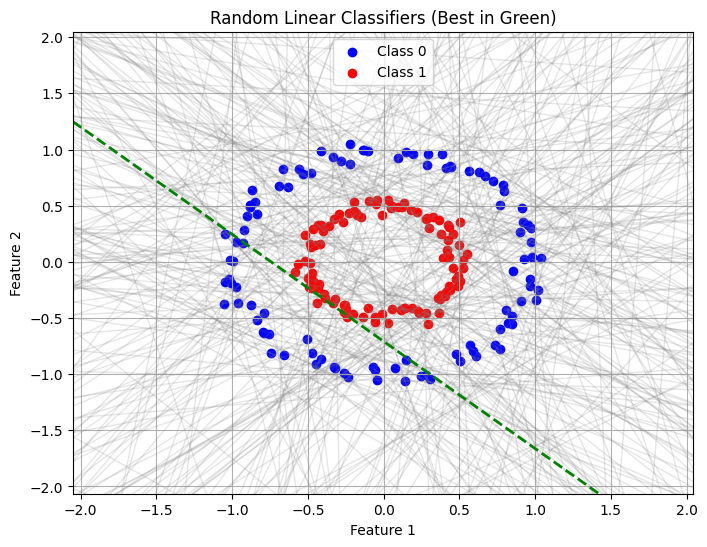

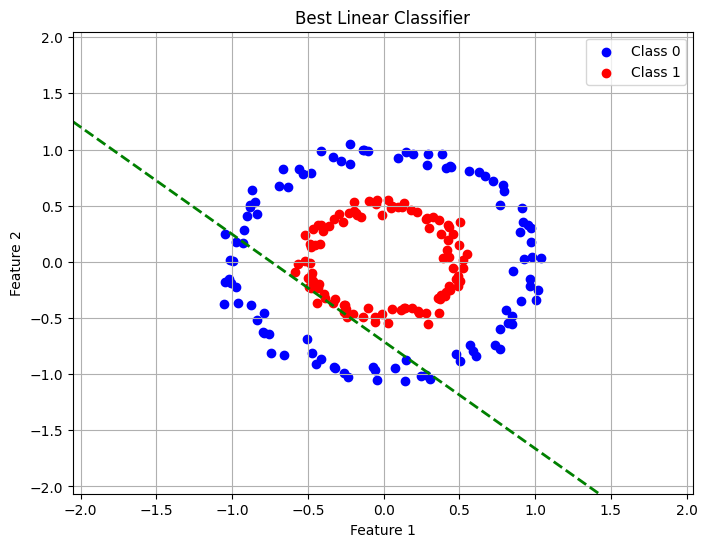

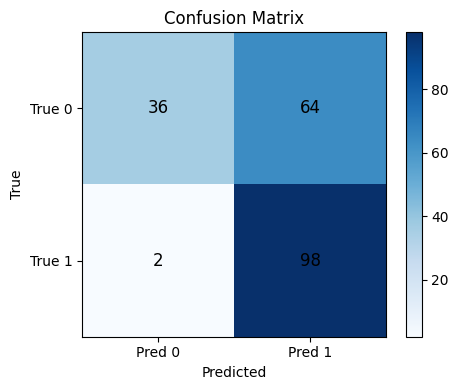

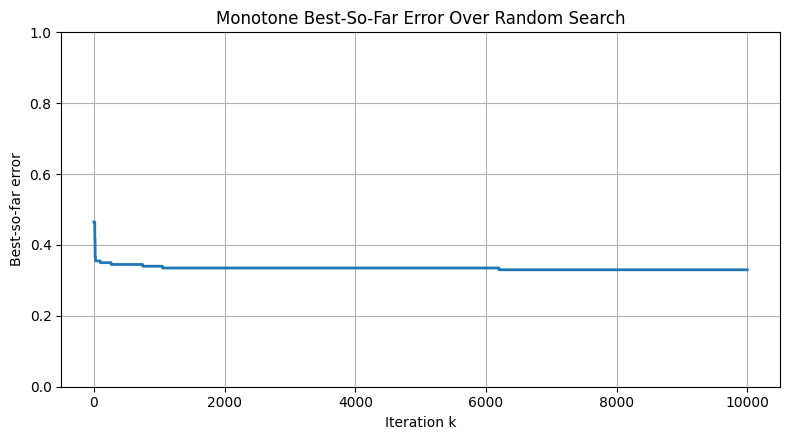

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles


# ---------------------------
# Plotting helpers
# ---------------------------
def _plot_points(ax, X, y):
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='red',  label='Class 1')

def _data_limits(X, pad=1.0):
    xlim = (X[:, 0].min() - pad, X[:, 0].max() + pad)
    ylim = (X[:, 1].min() - pad, X[:, 1].max() + pad)
    return xlim, ylim

def _plot_line_from_wb(ax, w, b, xlim, *, color='gray', alpha=0.2, lw=1.0, ls='-'):
    w0, w1 = float(w[0]), float(w[1])
    b = float(b)
    if abs(w1) > 1e-12:
        xx1 = np.linspace(xlim[0], xlim[1], 100)
        xx2 = (-w0 * xx1 - b) / w1
        ax.plot(xx1, xx2, color=color, alpha=alpha, linewidth=lw, linestyle=ls)
    elif abs(w0) > 1e-12:
        x = -b / w0
        ax.axvline(x=x, color=color, alpha=alpha, linewidth=lw, linestyle=ls)

def plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300):
    """Plots up to max_lines random decision boundaries (gray) and highlights the best (green).
       Figure is zoomed to the training data extent."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Random Linear Classifiers (Best in Green)')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    n = len(all_biases)
    if n > max_lines:
        idx = np.random.choice(n, size=max_lines, replace=False)
    else:
        idx = np.arange(n)

    for i in idx:
        _plot_line_from_wb(ax, all_weights[i], all_biases[i], xlim,
                           color='gray', alpha=0.2, lw=1.0, ls='-')

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_best_only(X, y, best_weights, best_bias):
    """Plots only the best decision boundary with the data, zoomed to training data."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Best Linear Classifier')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Plots confusion matrix as a heatmap."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.xticks([0, 1], ["Pred 0", "Pred 1"])
    plt.yticks([0, 1], ["True 0", "True 1"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    for i in range(2):
        for j in range(2):
            plt.text(j, i, int(cm[i, j]), ha="center", va="center", color="black", fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_best_so_far_error(cum_best_error):
    """Plots the monotone best-so-far error vs iteration k."""
    plt.figure(figsize=(8, 4.5))
    plt.plot(cum_best_error, linewidth=2)
    plt.xlabel("Iteration k")
    plt.ylabel("Best-so-far error")
    plt.title("Monotone Best-So-Far Error Over Random Search")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def compute_accuracy(X, y, weights, bias):
    scores = weights[0] * X[:, 0] + weights[1] * X[:, 1] + bias
    preds = (scores > 0).astype(int)
    acc = (preds == y).mean()
    return acc, preds

# Data + Random Search (loop)
np.random.seed(123)
num_samples = 200
# X = np.random.rand(num_samples, 2) * 10
# y = (X[:, 0] + X[:, 1] > 10).astype(int)
X,y = make_circles(n_samples=num_samples, factor=0.5, noise=0.05)




k = 10000
all_weights, all_biases = [], []
acc_history, best_acc_history = [], []
best_weights, best_bias = None, None
best_error = np.inf
best_preds = None
cum_best_error = []
tol = 0.0

for _ in range(k):
    weights = np.random.rand(2) * 2 - 1
    bias = np.random.rand() * 2 - 1

    acc, preds = compute_accuracy(X, y, weights, bias)
    err = 1.0 - acc

    all_weights.append(weights)
    all_biases.append(bias)

    if err < best_error - tol:
        best_error = err
        best_weights = weights
        best_bias = bias
        best_preds = preds

    cum_best_error.append(best_error)

    acc_history.append(acc)
    best_acc_history.append(1.0-best_error)

cum_best_error = np.array(cum_best_error)

print(f"Best Weights: {best_weights}")
print(f"Best Bias: {best_bias}")
print(f"Best Accuracy: {1.0 - best_error:.4f}")

plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300)
plot_best_only(X, y, best_weights, best_bias)
plot_confusion_matrix(y, best_preds)
plot_best_so_far_error(cum_best_error)




Optional +3 pts): Simple feature mapping (e.g., quadratic terms) with brief comparison.

Best Weights: [ 0.17164793  0.22303152 -0.97948673]
Best Bias: 0.5313366724101185
Best Accuracy: 1.0000


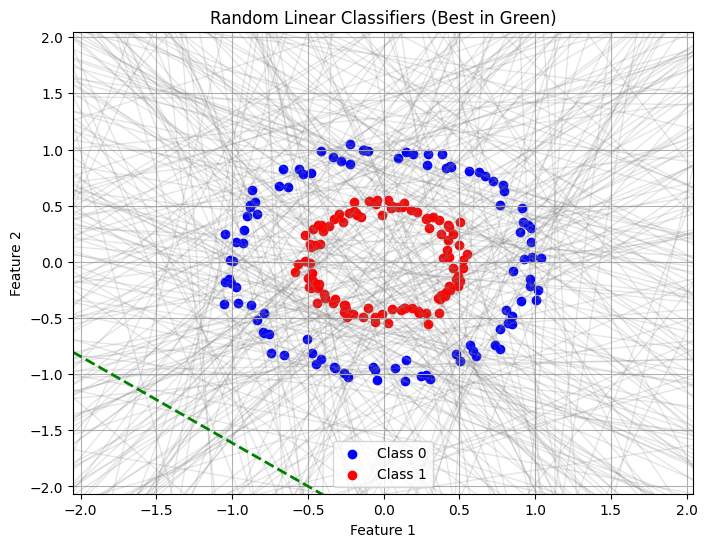

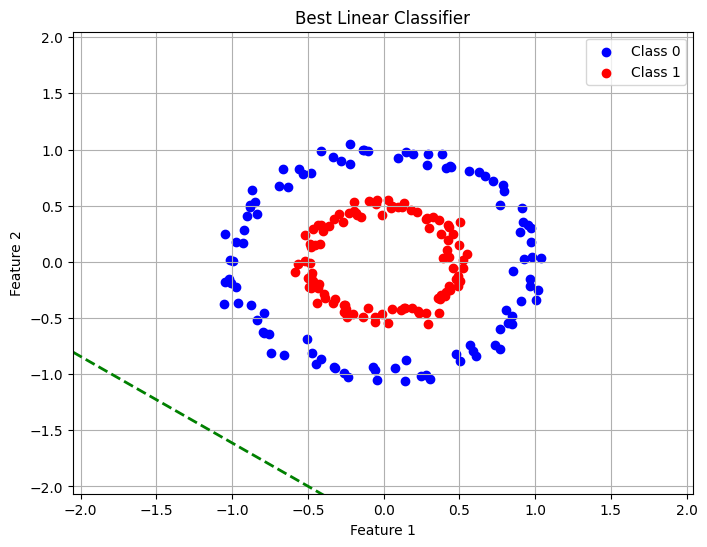

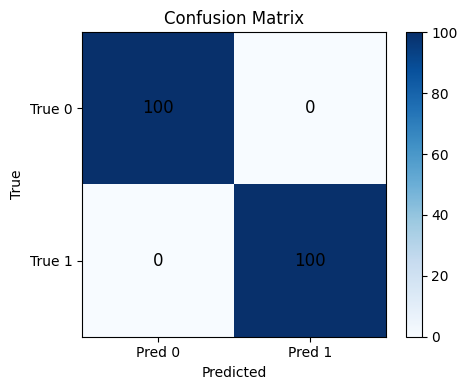

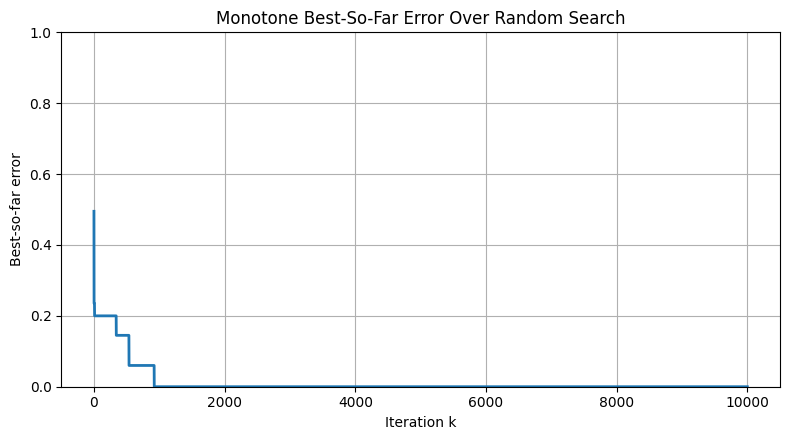

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_circles


# ---------------------------
# Plotting helpers
# ---------------------------
def _plot_points(ax, X, y):
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='red',  label='Class 1')

def _data_limits(X, pad=1.0):
    xlim = (X[:, 0].min() - pad, X[:, 0].max() + pad)
    ylim = (X[:, 1].min() - pad, X[:, 1].max() + pad)
    return xlim, ylim

def _plot_line_from_wb(ax, w, b, xlim, *, color='gray', alpha=0.2, lw=1.0, ls='-'):
    w0, w1 = float(w[0]), float(w[1])
    b = float(b)
    if abs(w1) > 1e-12:
        xx1 = np.linspace(xlim[0], xlim[1], 100)
        xx2 = (-w0 * xx1 - b) / w1
        ax.plot(xx1, xx2, color=color, alpha=alpha, linewidth=lw, linestyle=ls)
    elif abs(w0) > 1e-12:
        x = -b / w0
        ax.axvline(x=x, color=color, alpha=alpha, linewidth=lw, linestyle=ls)

def plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300):
    """Plots up to max_lines random decision boundaries (gray) and highlights the best (green).
       Figure is zoomed to the training data extent."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Random Linear Classifiers (Best in Green)')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    n = len(all_biases)
    if n > max_lines:
        idx = np.random.choice(n, size=max_lines, replace=False)
    else:
        idx = np.arange(n)

    for i in idx:
        _plot_line_from_wb(ax, all_weights[i], all_biases[i], xlim,
                           color='gray', alpha=0.2, lw=1.0, ls='-')

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_best_only(X, y, best_weights, best_bias):
    """Plots only the best decision boundary with the data, zoomed to training data."""
    fig, ax = plt.subplots(figsize=(8, 6))
    _plot_points(ax, X, y)
    ax.set_xlabel('Feature 1'); ax.set_ylabel('Feature 2')
    ax.set_title('Best Linear Classifier')
    ax.grid(True)

    xlim, ylim = _data_limits(X, pad=1.0)
    ax.set_xlim(*xlim); ax.set_ylim(*ylim)

    _plot_line_from_wb(ax, best_weights, best_bias, xlim,
                       color='green', alpha=1.0, lw=2.0, ls='--')
    ax.legend()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Plots confusion matrix as a heatmap."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.xticks([0, 1], ["Pred 0", "Pred 1"])
    plt.yticks([0, 1], ["True 0", "True 1"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    for i in range(2):
        for j in range(2):
            plt.text(j, i, int(cm[i, j]), ha="center", va="center", color="black", fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_best_so_far_error(cum_best_error):
    """Plots the monotone best-so-far error vs iteration k."""
    plt.figure(figsize=(8, 4.5))
    plt.plot(cum_best_error, linewidth=2)
    plt.xlabel("Iteration k")
    plt.ylabel("Best-so-far error")
    plt.title("Monotone Best-So-Far Error Over Random Search")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def compute_accuracy(X, y, weights, bias):
    scores = weights[0] * X[:, 0] + weights[1] * X[:, 1] + weights[2] * X[:,2] + bias
    preds = (scores > 0).astype(int)
    acc = (preds == y).mean()
    return acc, preds

# Data + Random Search (loop)
np.random.seed(123)
num_samples = 200
# X = np.random.rand(num_samples, 2) * 10
# y = (X[:, 0] + X[:, 1] > 10).astype(int)
X,y = make_circles(n_samples=num_samples, factor=0.5, noise=0.05)
X_mapped = np.column_stack((X, X[:,0]**2 + X[:,1]**2))




k = 10000
all_weights, all_biases = [], []
acc_history, best_acc_history = [], []
best_weights, best_bias = None, None
best_error = np.inf
best_preds = None
cum_best_error = []
tol = 0.0

for _ in range(k):
    weights = np.random.rand(3) * 2 - 1
    bias = np.random.rand() * 2 - 1

    acc, preds = compute_accuracy(X_mapped, y, weights, bias)
    err = 1.0 - acc

    all_weights.append(weights)
    all_biases.append(bias)

    if err < best_error - tol:
        best_error = err
        best_weights = weights
        best_bias = bias
        best_preds = preds

    cum_best_error.append(best_error)

    acc_history.append(acc)
    best_acc_history.append(1.0-best_error)

cum_best_error = np.array(cum_best_error)

print(f"Best Weights: {best_weights}")
print(f"Best Bias: {best_bias}")
print(f"Best Accuracy: {1.0 - best_error:.4f}")

plot_all_and_best(X, y, all_weights, all_biases, best_weights, best_bias, max_lines=300)
plot_best_only(X, y, best_weights, best_bias)
plot_confusion_matrix(y, best_preds)
plot_best_so_far_error(cum_best_error)




The linear classifier achieved only 67% accuracy because the data set is not linear, but concentric circles, a single line boundsry can't separate points that are in circle shape so many points are classified wrong. Geometrically, the boundary is circle, but our classifier is linear and intersects both classes.
Adding the quadratic feature gives the classifier a chance to create a nonlinear decision boundary that can separate the circles. The feature mapping resulted in 100% clasification

## Extensions (Choose 1–2)


### 🧭 Rubric (Extensions) — up to +10 pts extra credit
- **Scope (5 pts):** Implements one substantial extension (heatmap, alt metric, or reproducibility study).  
- **Insight (5 pts):** Clear explanation of what the extension reveals beyond earlier problems.



---
## 📊 Grading Summary
- Problem 1: 20 pts  
- Problem 2: 15 pts  
- Problem 3: 20 pts  
- Problem 4: 20 pts  
- Problem 5: 25 pts  
- Extensions: up to +10 pts extra credit  

**Total (without extra credit): 100 pts**
